In [1]:
import matplotlib.pyplot as plt
import scipy.integrate as sp
import numpy as np
import pysindy as ps
import time

from generate_lorenz96_model import generate_lorenz96_model




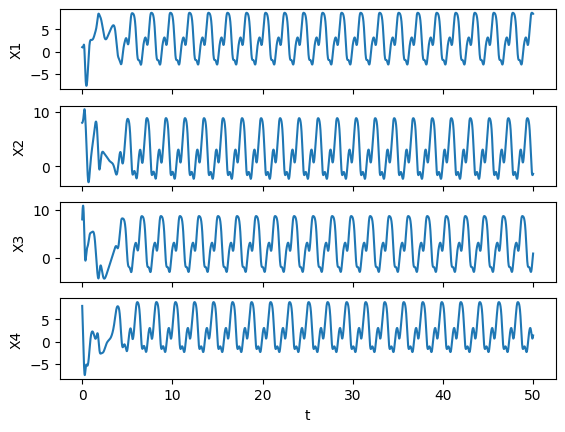

In [2]:
# Step 1: Generate data
# n from 4 to 20
n = 4
F = 8

lorenz96 = generate_lorenz96_model(n, F)

dt = 0.001
t = np.arange(0, 50, dt)

X0 = [8 for i in range(n)]
X0[0] = 1

X = sp.odeint(lorenz96, X0, t, tfirst=True)
# print(X.shape)

eps = 1
X_dot = np.zeros(X.shape)
for i in range(0, len(t)):
    X_dot[i, :] = lorenz96(t[i], X[i, :])

# X_dot = X_dot + eps*np.random.randn(X_dot.shape[0], X_dot.shape[1])

# plot orbit
plt.ion()
plt.figure()

for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i])#原函数数值解
    plt.ylabel('X'+str(i+1))
    
    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)

plt.xlabel('t')
plt.show()

# Step 1: Using finite differences to obtain the derivative matrix. | Mainly used for noise-free orbits.
differentiation_method = ps.FiniteDifference(order=2)


In [4]:
# Step 2: Build basis library
feature_library = ps.PolynomialLibrary(degree=3)


In [5]:
# Step 3: Solve
# optimizer = ps.STLSQ(threshold=0.2)
optimizer = ps.STLSQ(threshold=0.5, alpha=1e-6)

# model = ps.SINDy(
#     differentiation_method=differentiation_method,
#     feature_library=feature_library,
#     optimizer=optimizer,
#     feature_names=["x1", "x2", "x3", "x4", "x5", "x6"],
# )

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer
)

# model.fit(X, t=t)

model.fit(x=X, t=t, x_dot=X_dot)

model.print(precision=6)


(x0)' = 8.000000 1 + -1.000000 x0 + 1.000000 x1 x3 + -1.000000 x2 x3
(x1)' = 8.000000 1 + -1.000000 x1 + 1.000000 x0 x2 + -1.000000 x0 x3
(x2)' = 8.000000 1 + -1.000000 x2 + -1.000000 x0 x1 + 1.000000 x1 x3
(x3)' = 8.000000 1 + -1.000000 x3 + 1.000000 x0 x2 + -1.000000 x1 x2


(x0)' = 8.000000 1 + -1.000000 x0 + 1.000000 x1 x3 + -1.000000 x2 x3
(x1)' = 8.000000 1 + -1.000000 x1 + 1.000000 x0 x2 + -1.000000 x0 x3
(x2)' = 8.000000 1 + -1.000000 x2 + -1.000000 x0 x1 + 1.000000 x1 x3
(x3)' = 8.000000 1 + -1.000000 x3 + 1.000000 x0 x2 + -1.000000 x1 x2


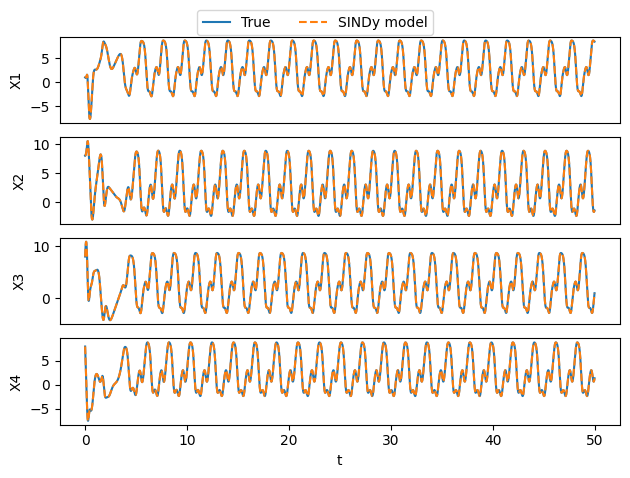

In [6]:
#Step 4: Evaluate

start_time = time.time() # start time
# x0, y0, z0 = X0
sim = model.simulate(X0, t=t)
end_time = time.time() # end time
run_time = end_time - start_time

# See the running time in the record_time.txt
with open('record_time.txt', 'a+') as f:
    f.write(f"Dimension: {n:>2}, Run time: {run_time:.2f}s\n")


# plot orbit
plt.ion()

fig = plt.figure()
for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i], label='True')
    plt.plot(t, sim[:, i], '--', label='SINDy model')

    
    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)
    plt.ylabel('X'+str(i+1))

plt.xlabel('t')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()
